In [5]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

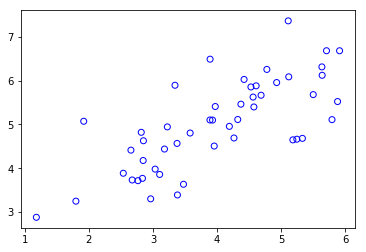

In [28]:
mat = loadmat('ex7data1.mat')
X = mat['X']
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='b')

In [29]:
def featureNormalize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0, ddof=1)
    X_norm = (X - means) / stds
    return X_norm, means, stds
def pca(X):
    sigma = (X.T @ X) / len(X)
    U, S, V = np.linalg.svd(sigma)
    return U, S, V

[-0.70710678 -0.70710678]


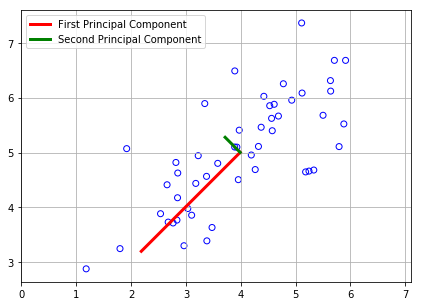

In [31]:
X_norm, means, stds = featureNormalize(X)
U, S, V = pca(X_norm)

print(U[:,0]) 
plt.figure(figsize=(7, 5))
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='b')

plt.plot([means[0], means[0] + 1.5*S[0]*U[0,0]], 
         [means[1], means[1] + 1.5*S[0]*U[0,1]],
        c='r', linewidth=3, label='First Principal Component')
plt.plot([means[0], means[0] + 1.5*S[1]*U[1,0]], 
         [means[1], means[1] + 1.5*S[1]*U[1,1]],
        c='g', linewidth=3, label='Second Principal Component')
plt.grid()
plt.axis("equal")  
plt.legend()


In [32]:
def projectData(X, U, K):
    Z = X @ U[:,:K]
    return Z
def recoverData(Z, U, K):
    X_rec = Z @ U[:,:K].T
    return X_rec


In [33]:
Z = projectData(X_norm, U, 1)
X_rec = recoverData(Z, U, 1)


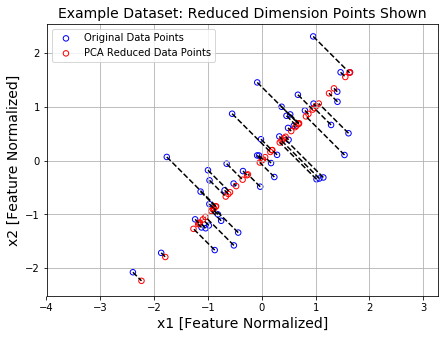

In [34]:
plt.figure(figsize=(7,5))
plt.axis("equal") 
plot = plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
plot = plt.scatter(X_rec[:,0], X_rec[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)
plt.grid(True)

for x in range(X_norm.shape[0]):
    plt.plot([X_norm[x,0],X_rec[x,0]],[X_norm[x,1],X_rec[x,1]],'k--')
    # 输入第一项全是X坐标，第二项都是Y坐标
plt.legend()


In [56]:
#人脸的PCA降维
mat = loadmat('ex7faces.mat')
X = mat['X']


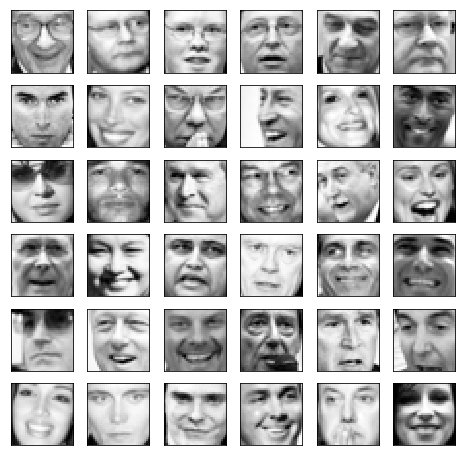

In [38]:
def displayData(X, row, col):
    fig, axs = plt.subplots(row, col, figsize=(8,8))
    for r in range(row):
        for c in range(col):
            axs[r][c].imshow(X[r*col + c].reshape(32,32).T, cmap = 'Greys_r')
            axs[r][c].set_xticks([])
            axs[r][c].set_yticks([])
            
displayData(X, 6, 6)


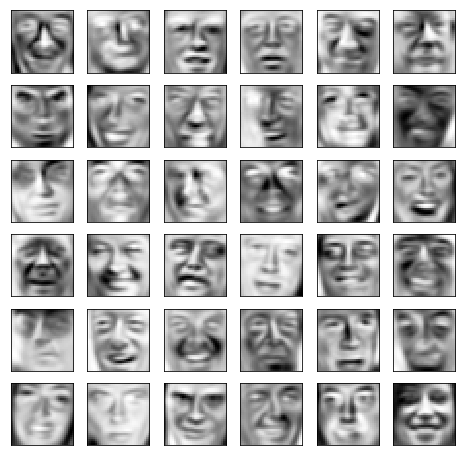

In [60]:
X_norm, means, stds = featureNormalize(X)
U, S, V = pca(X_norm)
z = projectData(X_norm, U, K=100)
X_rec = recoverData(z, U, K=100)
displayData(X_rec, 6, 6)
